Object type: Pitch
Object name: <no name>
Date: Mon Feb 17 13:18:38 2025

Time domain:
   Start time: 0 seconds
   End time: 29.04 seconds
   Total duration: 29.04 seconds
Time sampling:
   Number of frames: 2901 (1098 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.019999999999998793 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 203.310771 Hz = 173.007766 Mel = 12.2842398 semitones above 100 Hz = 5.43276978 ERB
   16% = 204.306337 Hz = 173.73416 Mel = 12.3688075 semitones above 100 Hz = 5.45358194 ERB
   50% = 207.036948 Hz = 175.72158 Mel = 12.598659 semitones above 100 Hz = 5.51045249 ERB
   84% = 212.547903 Hz = 179.710878 Mel = 13.0534563 semitones above 100 Hz = 5.62429229 ERB
   90% = 213.086161 Hz = 180.098969 Mel = 13.0972428 semitones above 100 Hz = 5.63534467 ERB
Estimated spreading:
   84%-median = 5.513 Hz = 3.991 Mel = 0.455 semitones = 0.1139 ERB
   median-16% = 2.732 Hz = 1.988 Mel = 0.23 semitones = 0.0569 ERB
   90%-10% = 9.78 Hz = 7.094 Me

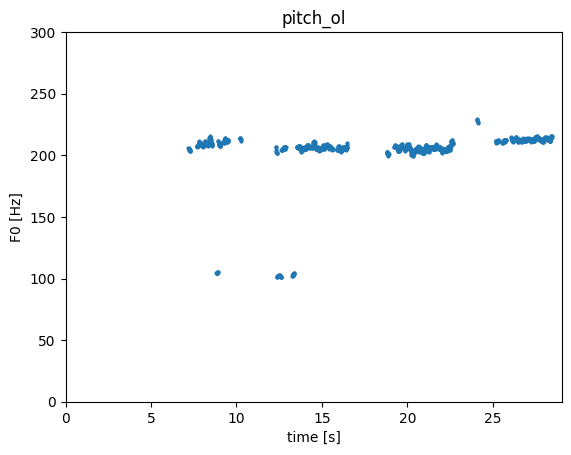

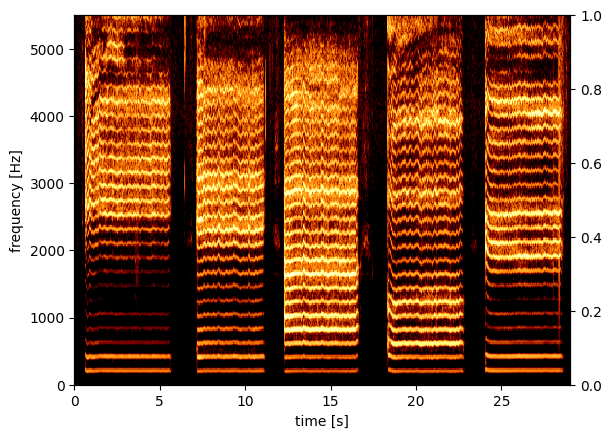

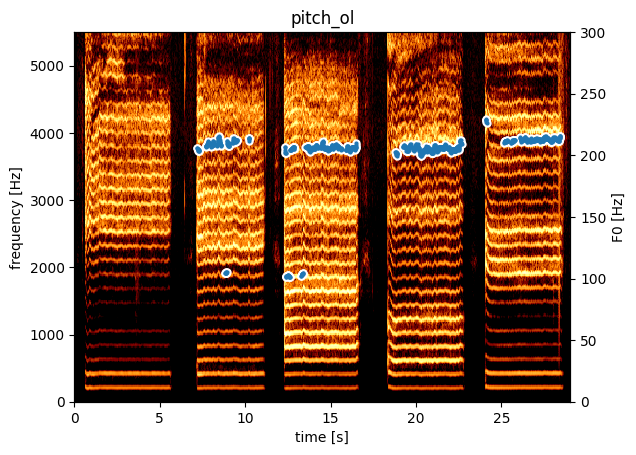

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import matplotlib.pyplot as plt

audio_file = "audio_files_pre/VOW/1234568/1234568_0_VOW_1_pre.wav"
pitch_plot_title = f"pitch_ol"
pitch_y_axis_height = 300
spectrogram_window_length = 0.05
spectrogram_max_freq = 5500

## mimicking PP_f0 from extraction_functions_praat.py
sound = parselmouth.Sound(f'{audio_file}')
pitch = sound.to_pitch()
end_time = sound.get_end_time()
print(pitch)

def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch_y_axis_height)
    plt.xlim(0, end_time)
    plt.ylabel("F0 [Hz]")
    plt.xlabel("time [s]")
    plt.title(f"{pitch_plot_title}")
    
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    
## draw pitch
draw_pitch(pitch)
plt.show()

## draw spectrogram
spectrogram = audio_file.to_spectrogram(window_length=spectrogram_window_length, maximum_frequency=spectrogram_max_freq)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
plt.xlim([audio_file.xmin, audio_file.xmax])
plt.show()

## draw spectrogram + pitch
spectrogram = audio_file.to_spectrogram(window_length=spectrogram_window_length, maximum_frequency=spectrogram_max_freq)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio_file.xmin, audio_file.xmax])
plt.show()


Object type: Pitch
Object name: <no name>
Date: Mon Feb 17 12:33:59 2025

Time domain:
   Start time: 0 seconds
   End time: 29.04 seconds
   Total duration: 29.04 seconds
Time sampling:
   Number of frames: 2901 (1098 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.019999999999998793 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 203.310771 Hz = 173.007766 Mel = 12.2842398 semitones above 100 Hz = 5.43276978 ERB
   16% = 204.306337 Hz = 173.73416 Mel = 12.3688075 semitones above 100 Hz = 5.45358194 ERB
   50% = 207.036948 Hz = 175.72158 Mel = 12.598659 semitones above 100 Hz = 5.51045249 ERB
   84% = 212.547903 Hz = 179.710878 Mel = 13.0534563 semitones above 100 Hz = 5.62429229 ERB
   90% = 213.086161 Hz = 180.098969 Mel = 13.0972428 semitones above 100 Hz = 5.63534467 ERB
Estimated spreading:
   84%-median = 5.513 Hz = 3.991 Mel = 0.455 semitones = 0.1139 ERB
   median-16% = 2.732 Hz = 1.988 Mel = 0.23 semitones = 0.0569 ERB
   90%-10% = 9.78 Hz = 7.094 Me

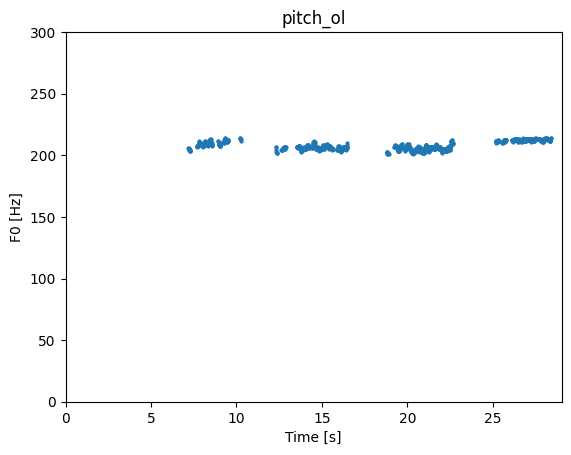

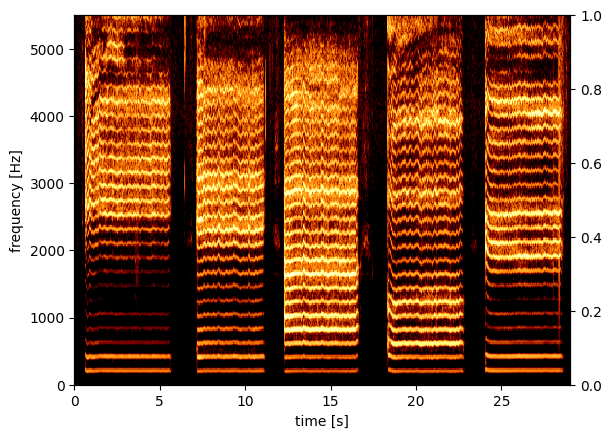

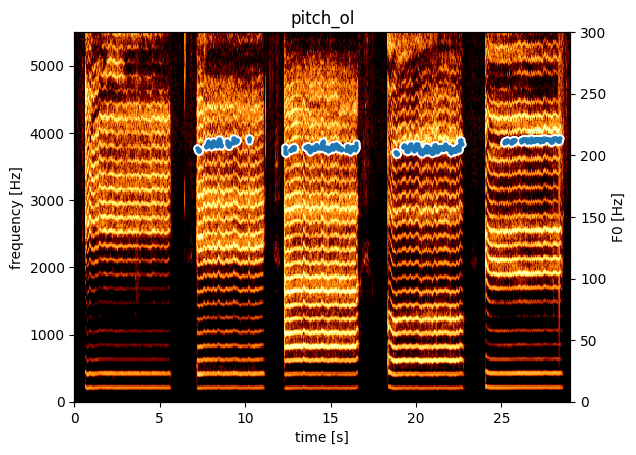

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import matplotlib.pyplot as plt

audio_file = "audio_files_pre/VOW/1234568/1234568_0_VOW_1_pre.wav"
pitch_plot_title = f"pitch_ol"
pitch_y_axis_height = 300
spectrogram_window_length = 0.05
spectrogram_max_freq = 5500

sound = parselmouth.Sound(f'{audio_file}')
pitch = sound.to_pitch()
end_time = sound.get_end_time()
print(pitch)

def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    time_values = pitch.xs()
    voiced = pitch_values > 0
    pitch_values = pitch_values[voiced]
    time_values = time_values[voiced]
    lower_bound, upper_bound = np.percentile(pitch_values, [5, 95])
    filtered_mask = (pitch_values >= lower_bound) & (pitch_values <= upper_bound)
    pitch_values = pitch_values[filtered_mask]
    time_values = time_values[filtered_mask]
    plt.plot(time_values, pitch_values, 'o', markersize=5, color='w')
    plt.plot(time_values, pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch_y_axis_height)
    plt.xlim(0, end_time)
    plt.ylabel("F0 [Hz]")
    plt.xlabel("Time [s]")
    plt.title(f"{pitch_plot_title}")
    
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    
## draw pitch
draw_pitch(pitch)
plt.show()

## draw spectrogram
spectrogram = audio_file.to_spectrogram(window_length=spectrogram_window_length, maximum_frequency=spectrogram_max_freq)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
plt.xlim([audio_file.xmin, audio_file.xmax])
plt.show()

## draw spectrogram + pitch
spectrogram = audio_file.to_spectrogram(window_length=spectrogram_window_length, maximum_frequency=spectrogram_max_freq)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio_file.xmin, audio_file.xmax])
plt.show()

In [ ]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt

audio_file = "audio_files_pre/VOW/1234568/1234568_0_VOW_1_pre.wav"

sound = parselmouth.Sound(audio_file)
mfcc_obj = sound.to_mfcc(number_of_coefficients=13)

mfcc_matrix = mfcc_obj.to_matrix().values
mfcc_matrix.shape

plt.figure(figsize=(10, 6))
plt.imshow(mfcc_matrix, aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label="Amplitude")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.title("MFCCs")
plt.show()